In [2]:
import os

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

'/Users/derickchiappo/Desktop/Kaggle /Black_Friday'

In [3]:
#Dataset Loading

Trains = pd.read_csv('train.csv')

In [10]:
#Basic Description of the dataset

print(Trains.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
None


There are missing values in the columns, Product_Category_2 and Prodcut_Category_3


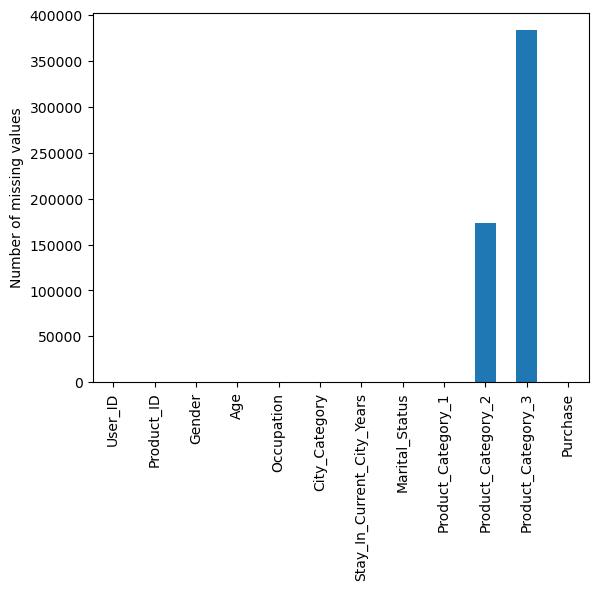

In [11]:
#Mising values

Trains.isna().sum().plot(kind = "bar",
                         ylabel = "Number of missing values")

print("There are missing values in the columns, Product_Category_2 and Prodcut_Category_3")

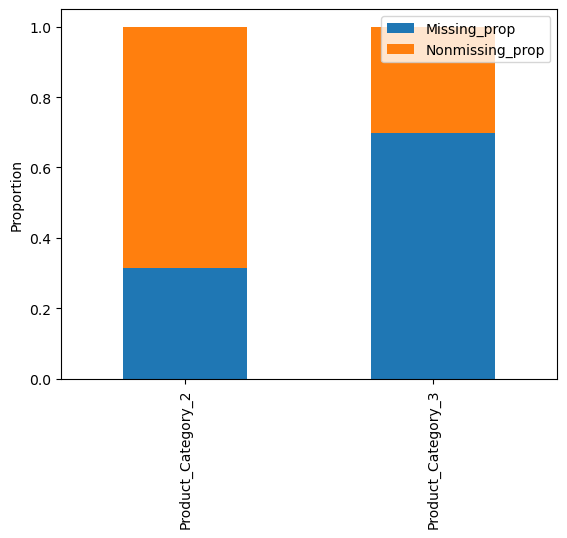

In [12]:
#Mising values
Missing_values_prop = Trains[["Product_Category_2","Product_Category_3"]].isna().sum()/len(Trains)

Missing_dataframe = pd.DataFrame({"Missing_prop":Missing_values_prop,
                                 "Nonmissing_prop":1 - Missing_values_prop})

Missing_dataframe.plot(kind = "bar",stacked = True)

plt.ylabel("Proportion")

plt.show()

In [13]:
#Data Transformations: Missing value replacement

Trains = Trains.fillna(0)

Trains.isna().any() == False

User_ID                       True
Product_ID                    True
Gender                        True
Age                           True
Occupation                    True
City_Category                 True
Stay_In_Current_City_Years    True
Marital_Status                True
Product_Category_1            True
Product_Category_2            True
Product_Category_3            True
Purchase                      True
dtype: bool

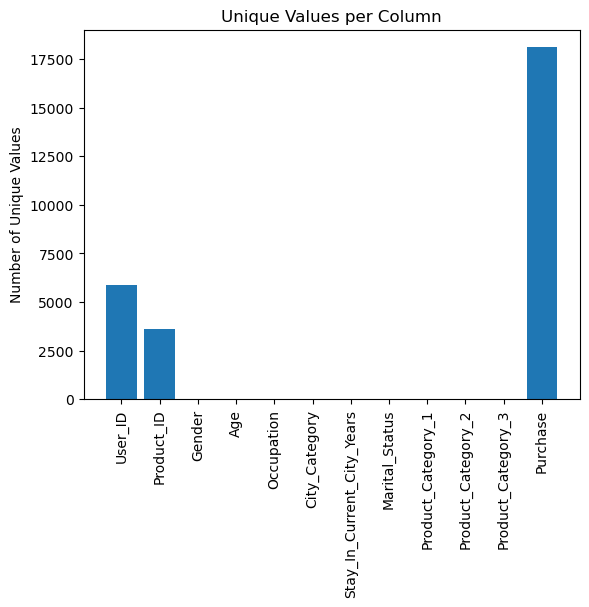

In [14]:
#Unique values

column_names = Trains.columns

unique_values = column_names.map(lambda x: Trains[x].drop_duplicates().count())

plt.bar(column_names,unique_values)

plt.xticks(rotation = 90)

plt.ylabel("Number of Unique Values")

plt.title("Unique Values per Column")

plt.show()

In [15]:
#Data Transformation: Generation of Categorical Variables

demographic_columns = ["User_ID","Gender","Age","Occupation","Stay_In_Current_City_Years","Marital_Status","City_Category"]

product_details = ["Product_ID","Product_Category_1",
                  "Product_Category_2","Product_Category_3"]

Trains[demographic_columns + product_details] = Trains[demographic_columns + product_details].astype("category")

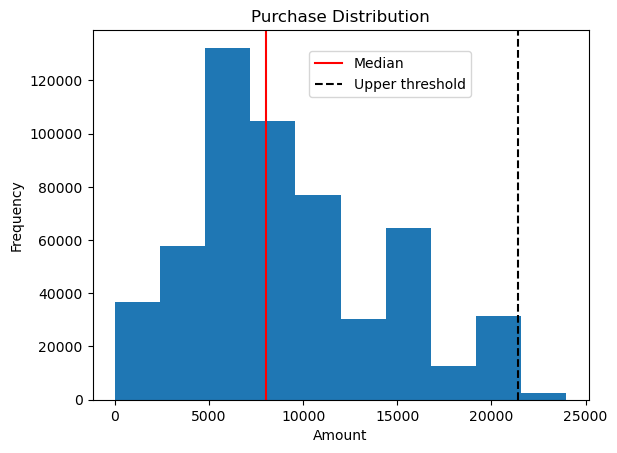

In [16]:
#Purchase Distribution and Outlier Detection
Purchase_stats = Trains["Purchase"].describe()

IQR = Purchase_stats["75%"] - Purchase_stats["25%"]

plt.hist(Trains["Purchase"],bins = 10)

plt.axvline(Purchase_stats["50%"],color = "red",
            label  = "Median")

plt.axvline(Purchase_stats["75%"] + (IQR*1.5),color = "black",
            linestyle = "--",label = "Upper threshold")

plt.ylabel("Frequency")

plt.xlabel("Amount")

plt.title("Purchase Distribution")

plt.legend(bbox_to_anchor = (0.6,0.8))

plt.show()

In [17]:
#Purchase Distribution and Outlier Detection
Upper_threshold = Purchase_stats["75%"] + (IQR*1.5)

Outliers = Trains[Trains["Purchase"] > Upper_threshold]

print("There are ",Outliers.shape[0]," outliers in the Purchase column")

There are  2677  outliers in the Purchase column


In [18]:
#EDA

nrows_by_user = Trains.groupby("User_ID")["User_ID"].count()

purchase_by_user = Trains.groupby("User_ID")["Purchase"].sum()

Data_by_users = pd.DataFrame({"Number_of_Purchases":nrows_by_user,"Amount_Purchased":purchase_by_user})

Most_purchases = list(Data_by_users[Data_by_users["Number_of_Purchases"] == Data_by_users["Number_of_Purchases"].max()].index)

print("The user with most purchases is:", Most_purchases,"with ",Data_by_users["Number_of_Purchases"].max()," purchases")

Most_purchased = list(Data_by_users[Data_by_users["Amount_Purchased"] == Data_by_users["Amount_Purchased"].max()].index)

print("User ", Most_purchased, "purchased the most at ", Data_by_users["Amount_Purchased"].max(),"dollars")



The user with most purchases is: [1001680] with  1026  purchases
User  [1004277] purchased the most at  10536909 dollars


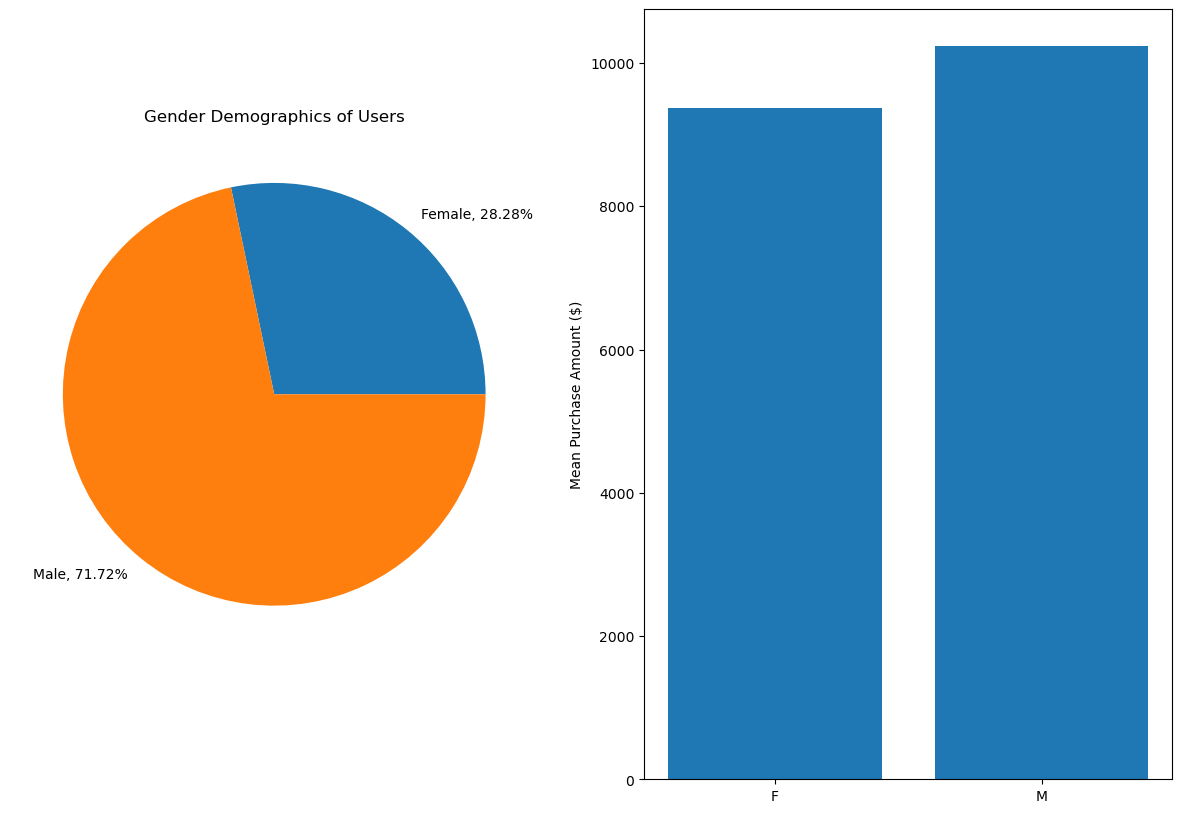

In [19]:
#Initial EDA
Data_by_Gender = Trains.drop_duplicates("User_ID").groupby("Gender").count()
proportions = (Data_by_Gender["User_ID"]/sum(Data_by_Gender["User_ID"]))*100

proportions = proportions.round(2)

Amount_Purchased_by_Gender = Trains.drop_duplicates("User_ID").groupby("Gender")["Purchase"].agg("mean")

xaxis = ["F","M"]

label = ["Female, " + str(proportions[0]) + "%","Male, " + str(proportions[1]) + "%"]

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,10))

ax1.pie(Data_by_Gender["User_ID"],labels = label)

ax1.set_title("Gender Demographics of Users")

ax2.bar(x = xaxis,height = Amount_Purchased_by_Gender)

ax2.set_ylabel("Mean Purchase Amount ($)")

plt.show()

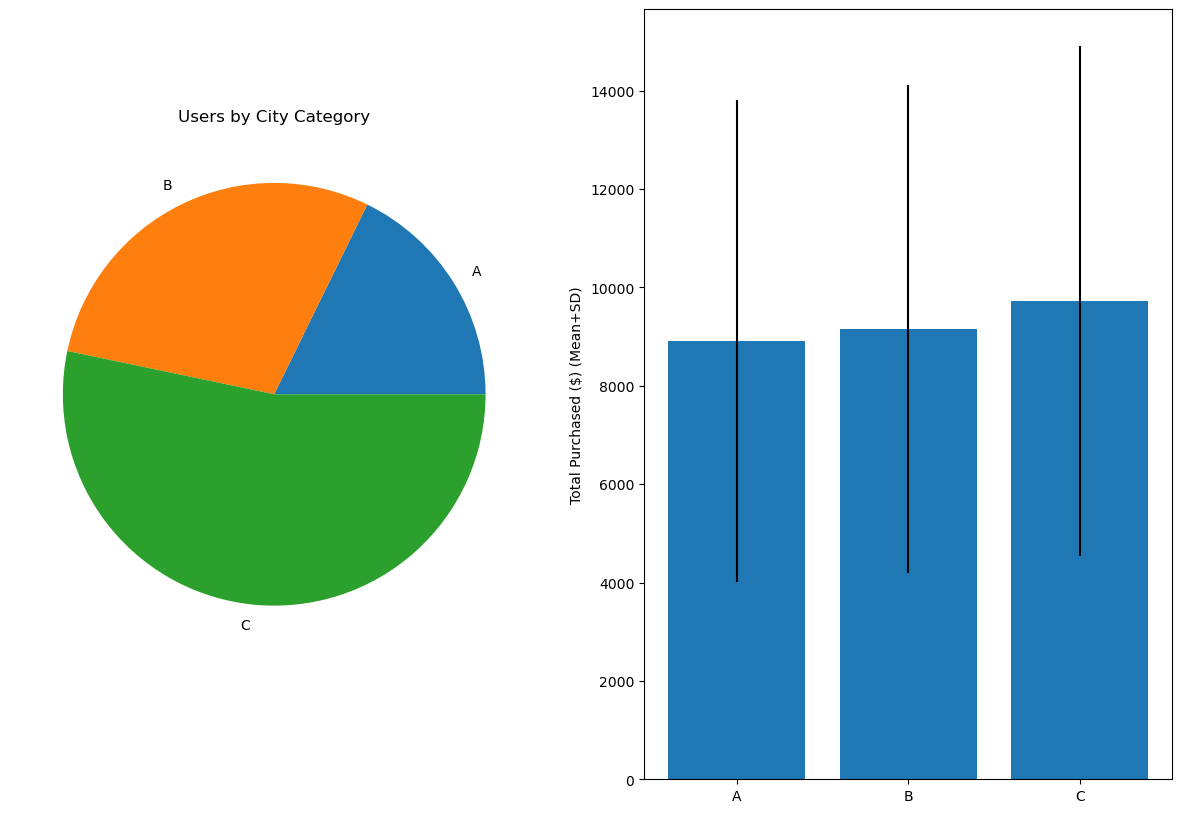

In [20]:
#Initial EDA
Data_by_City = Trains.drop_duplicates("User_ID").groupby("City_Category").count()

Amount_Purchased_by_City = Trains.groupby("City_Category")["Purchase"].agg(["mean","std"])

label = Trains["City_Category"].unique().sort_values()

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,10))

ax1.pie(Data_by_City["User_ID"],labels = label )

ax1.set_title("Users by City Category")

ax2.bar(x = label, height = Amount_Purchased_by_City["mean"],yerr = Amount_Purchased_by_City["std"])

ax2.set_ylabel("Total Purchased ($) (Mean+SD)")

plt.show()

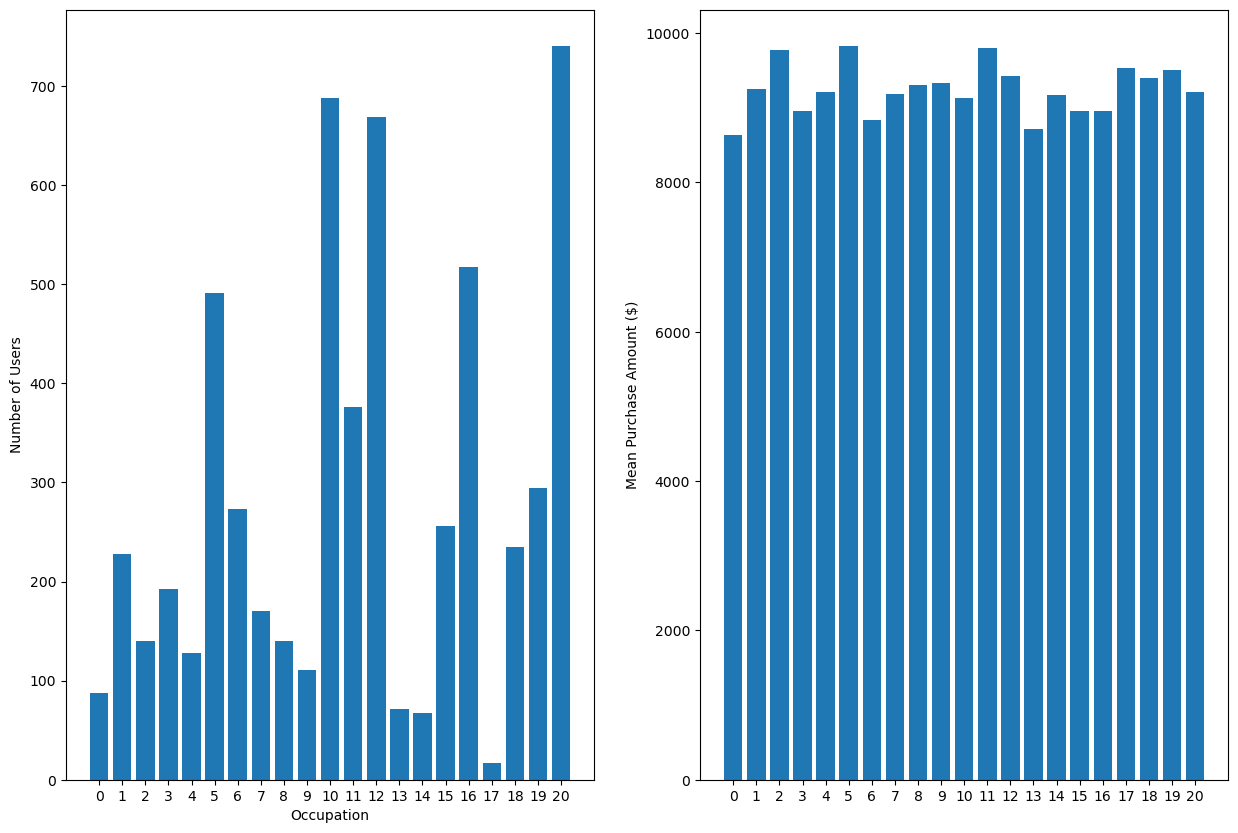

In [21]:
Users_by_Occupation = Trains.drop_duplicates("User_ID").groupby(["Occupation"])["User_ID"].count()

Purchase_by_Occupation = Trains.groupby("Occupation")["Purchase"].agg(["mean"])

Occupations = np.array(Trains["Occupation"].unique())

Purchase_by_Occupation

fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols = 2, figsize = (15,10),sharex = "row")

ax1.bar(Occupations,height = Users_by_Occupation)

ax1.set_xticks(Occupations)

ax1.set_xlabel("Occupation")

ax1.set_ylabel("Number of Users")

ax2.bar(x = Occupations,height = Purchase_by_Occupation["mean"])

ax2.set_ylabel("Mean Purchase Amount ($)")

plt.show()

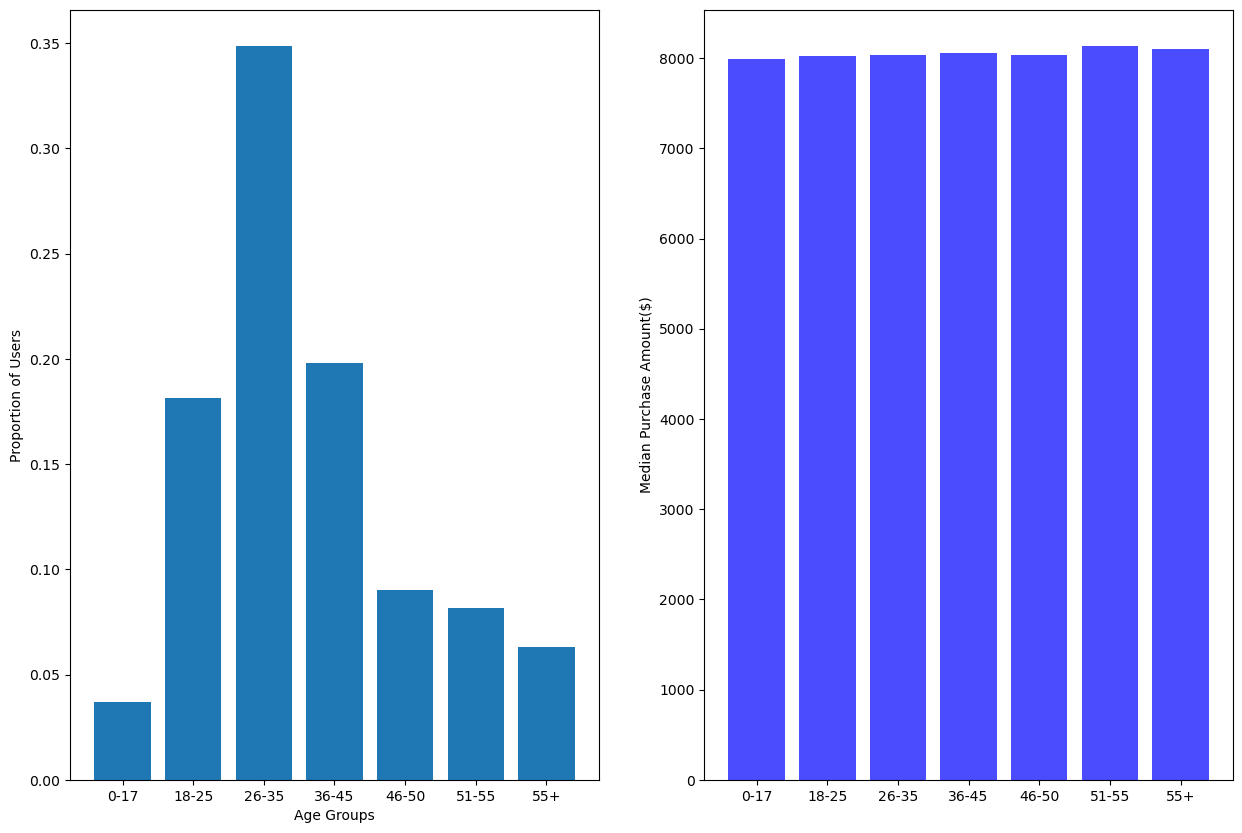

In [22]:
Users_by_Age = Trains.drop_duplicates("User_ID").sort_values("Age").groupby(["Age"])["User_ID"].count()

Purchase_by_Age_groups = Trains.sort_values("Age").groupby("Age")["Purchase"].agg(["median"])

Age_groups = Trains["Age"].unique()

fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols = 2, figsize = (15,10))

ax1.bar(Age_groups.sort_values(),height = Users_by_Age/Users_by_Age.sum())

ax1.set_xlabel("Age Groups")

ax1.set_ylabel("Proportion of Users")

ax2.bar(Age_groups.sort_values(),Purchase_by_Age_groups["median"],color = "blue", alpha = 0.7)

ax2.set_ylabel("Median Purchase Amount($)")

plt.show() 

In [25]:
#Data Transformation
Trains_transformed = Trains

Trains_transformed["Gender_integer"] = Trains["Gender"].map(lambda x: 0 if x == "F"  else 1)
        
for group in Age_groups:
    Trains_transformed[group] = [1 if x == group else 0 for x in Trains["Age"]]
    
for length in list(Trains["Stay_In_Current_City_Years"].unique()):
    Trains_transformed[length] = [1 if x == length else 0 for x in Trains["Stay_In_Current_City_Years"]]
    
print("Each categorical variable was one-hot encoded for further analysis")

Each categorical variable was one-hot encoded for further analysis


In [24]:
cols_to_drop = ["Stay_In_Current_City_Years","Gender","Age"]

Trains_transformed = Trains_transformed.drop(cols_to_drop,axis = 1)

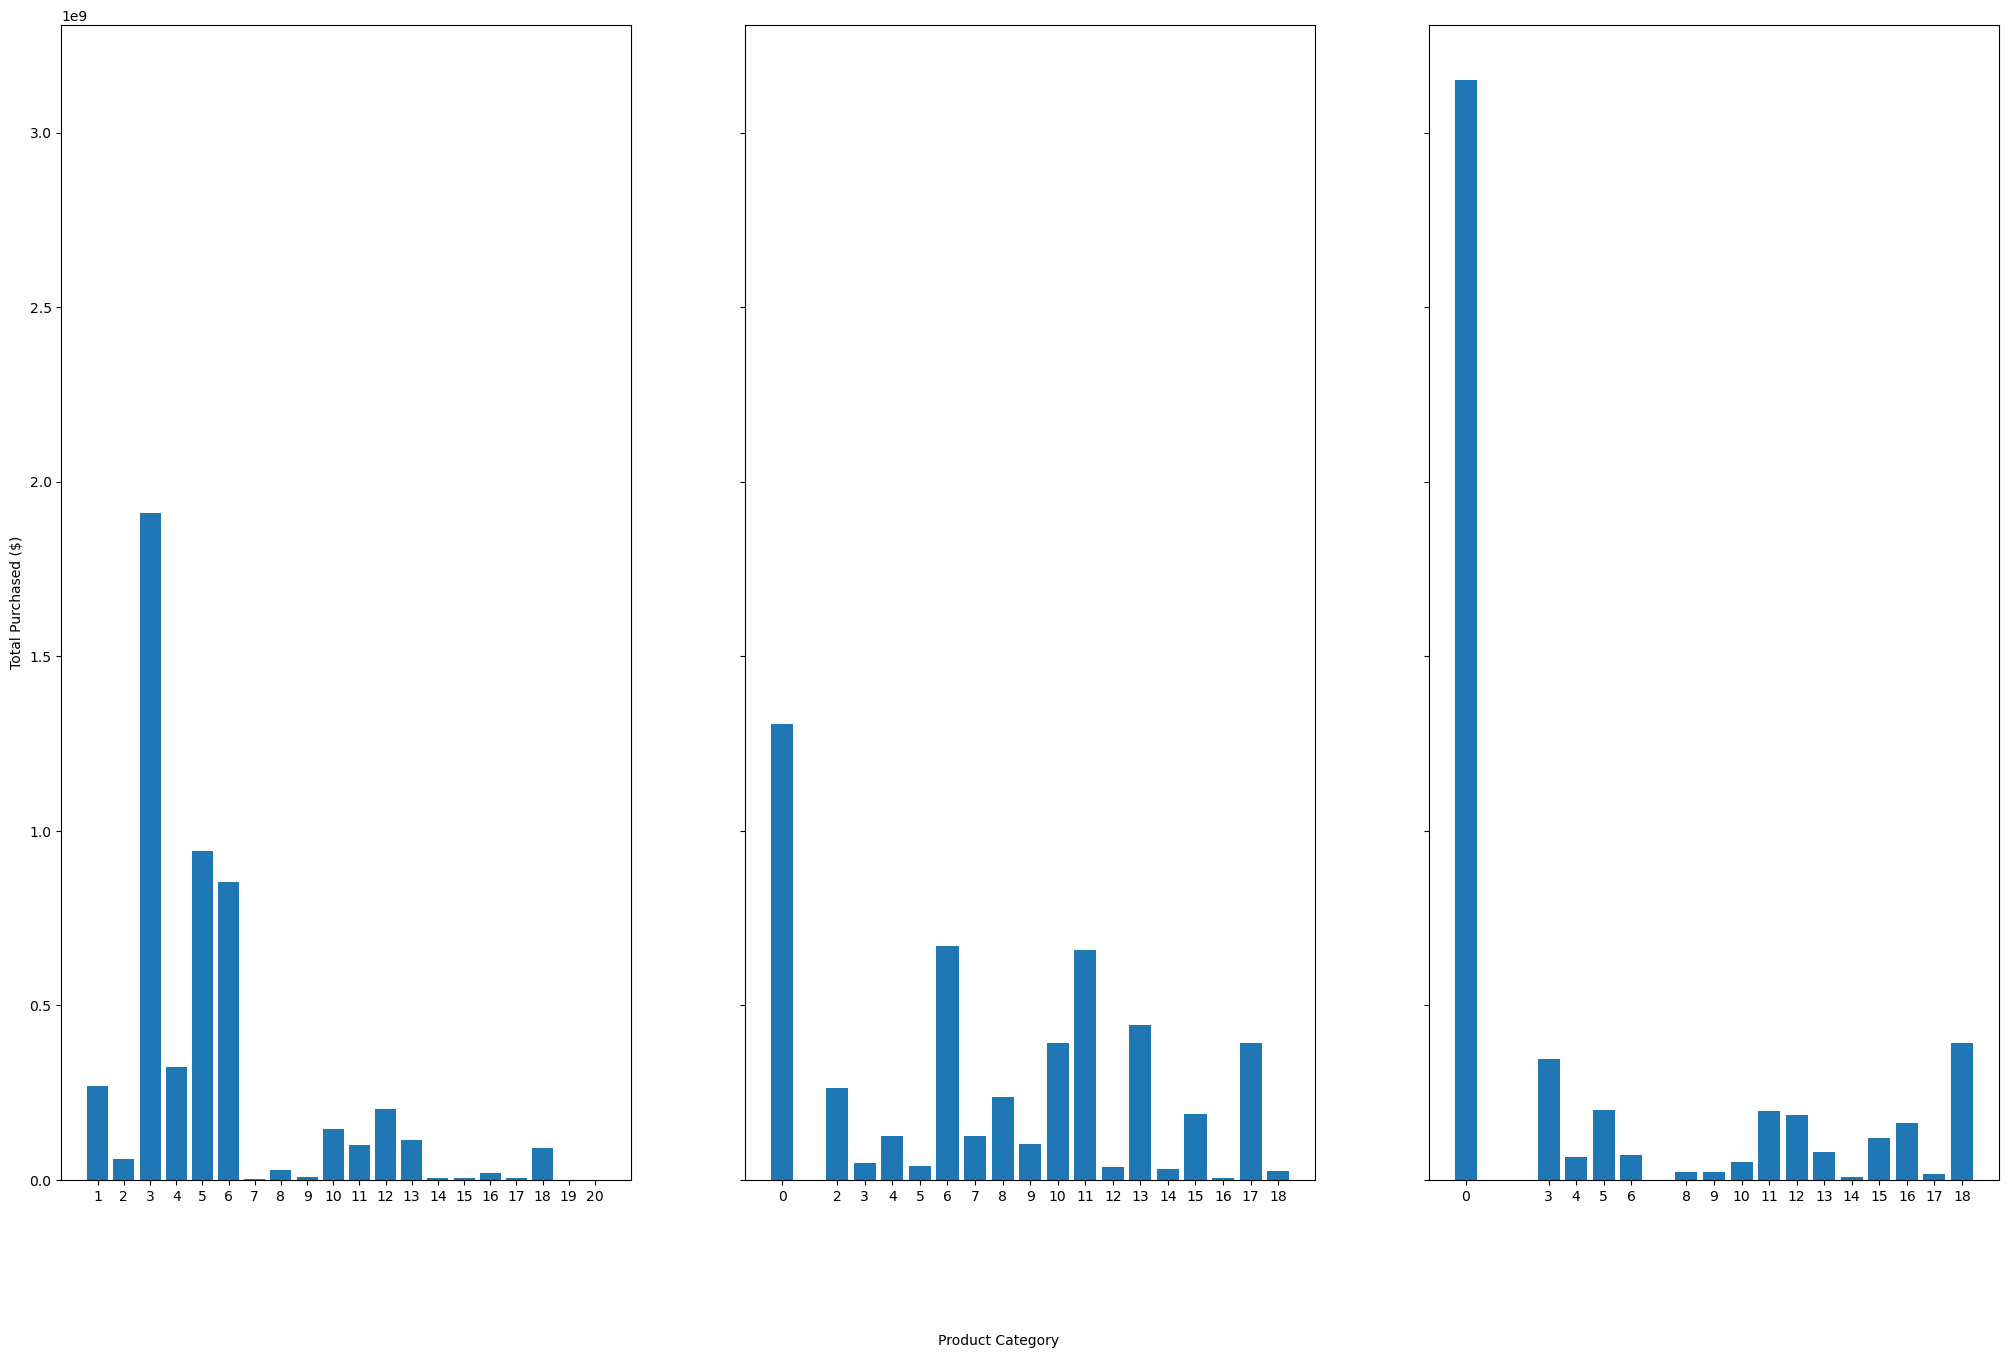

In [56]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows = 1,ncols = 3,figsize = (25,15),sharey = True)

ax1.bar(x = list(Trains_transformed["Product_Category_1"].unique()), height = Trains_transformed.groupby("Product_Category_1")["Purchase"].sum()) 

ax1.set_xticks(list(Trains_transformed["Product_Category_1"].unique()))

ax1.set_ylabel("Total Purchased ($)")

ax2.bar(x = list(Trains_transformed["Product_Category_2"].unique()), height = Trains_transformed.groupby("Product_Category_2")["Purchase"].sum()) 

ax2.set_xticks(list(Trains_transformed["Product_Category_2"].unique()))

ax3.bar(x = list(Trains_transformed["Product_Category_3"].unique()), height = Trains_transformed.groupby("Product_Category_3")["Purchase"].sum())

ax3.set_xticks(list(Trains_transformed["Product_Category_3"].unique()))

fig.text(0.5,0,"Product Category",ha = "center")

plt.show()